<a href="https://colab.research.google.com/github/Hamdan070905/Week3-NSP/blob/main/NSP_Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("country_wise.csv")
df


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [14]:
print(list(df.columns))

df.columns = df.columns.str.strip()

print(list(df.columns))


required_cols = ['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active']
for col in required_cols:
    print(f"{col}: {'Exists' if col in df.columns else 'Missing'}")





['Country', 'TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases']
['Country', 'TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases']
Country/Region: Missing
Confirmed: Missing
Deaths: Missing
Recovered: Missing
Active: Missing


In [20]:
print(df.isnull().sum())

df.dropna(inplace=True)

Country           0
TotalCases        0
TotalDeaths       0
TotalRecovered    0
ActiveCases       0
dtype: int64


In [25]:
df.columns = df.columns.str.strip()

print("Original Column Names:\n", list(df.columns))

df.rename(columns={
    'Country/Region': 'Country',
    'Confirmed': 'TotalCases',
    'Deaths': 'TotalDeaths',
    'Recovered': 'TotalRecovered',
    'Active': 'ActiveCases',
    'New cases': 'NewCases',
    'New deaths': 'NewDeaths',
    'New recovered': 'NewRecovered',
    'Deaths / 100 Cases': 'DeathPer100Cases',
    'Recovered / 100 Cases': 'RecoveredPer100Cases',
    'Deaths / 100 Recovered': 'DeathPer100Recovered',
    'Confirmed last week': 'ConfirmedLastWeek',
    '1 week change': 'WeeklyChange',
    '1 week % increase': 'WeeklyPercentIncrease',
    'WHO Region': 'WHORegion'
}, inplace=True)

print("\nRenamed Column Names:\n", list(df.columns))


Original Column Names:
 ['Country', 'TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases']

Renamed Column Names:
 ['Country', 'TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases']


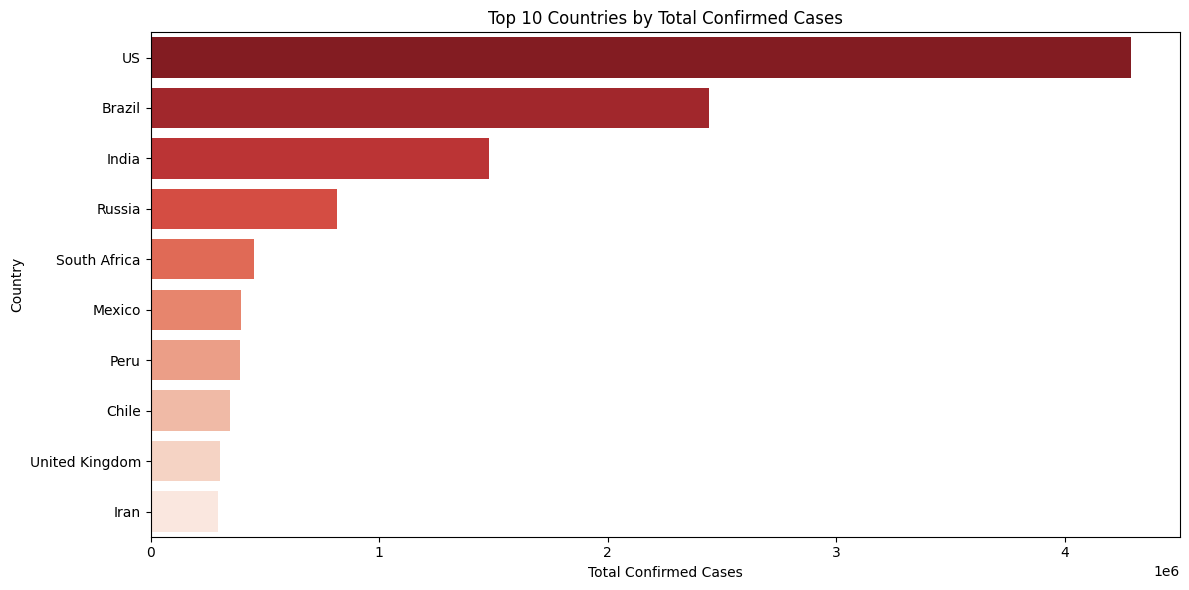

In [26]:
top_10_cases = df.sort_values(by='TotalCases', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='TotalCases', y='Country', data=top_10_cases, palette='Reds_r')
plt.title('Top 10 Countries by Total Confirmed Cases')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


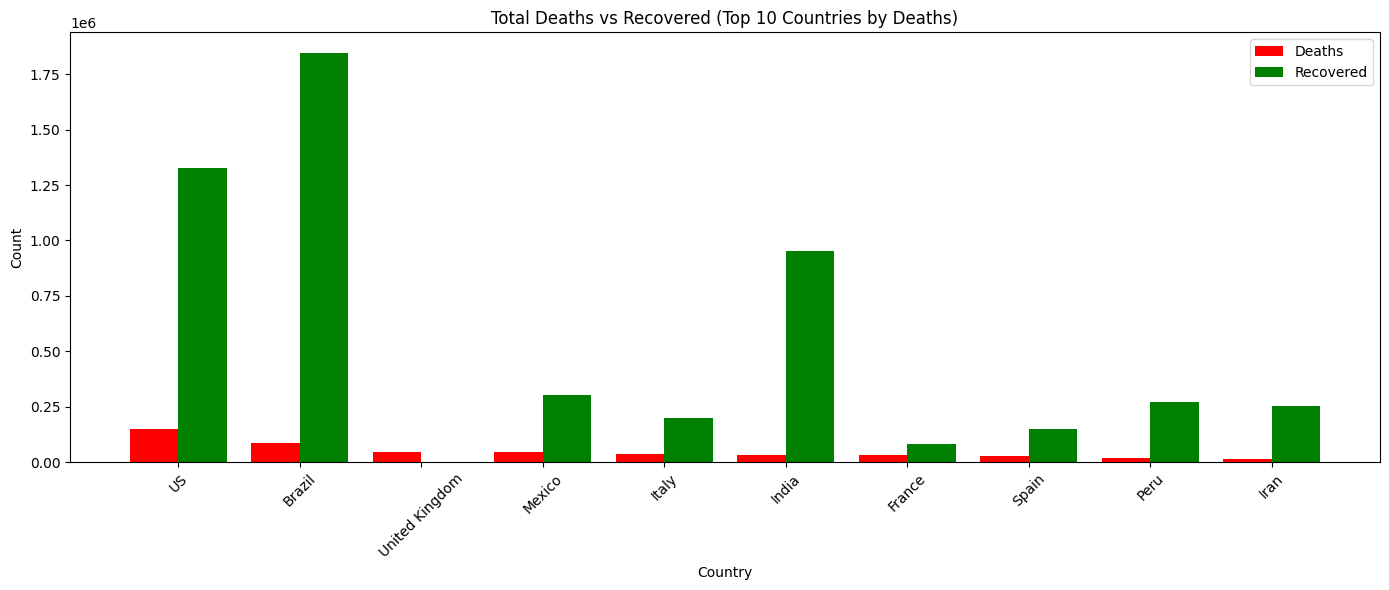

In [27]:
top_10_deaths_recovered = df.sort_values(by='TotalDeaths', ascending=False).head(10)

plt.figure(figsize=(14,6))
bar_width = 0.4
index = np.arange(len(top_10_deaths_recovered['Country']))

plt.bar(index, top_10_deaths_recovered['TotalDeaths'], width=bar_width, label='Deaths', color='red')
plt.bar(index + bar_width, top_10_deaths_recovered['TotalRecovered'], width=bar_width, label='Recovered', color='green')

plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Total Deaths vs Recovered (Top 10 Countries by Deaths)')
plt.xticks(index + bar_width/2, top_10_deaths_recovered['Country'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


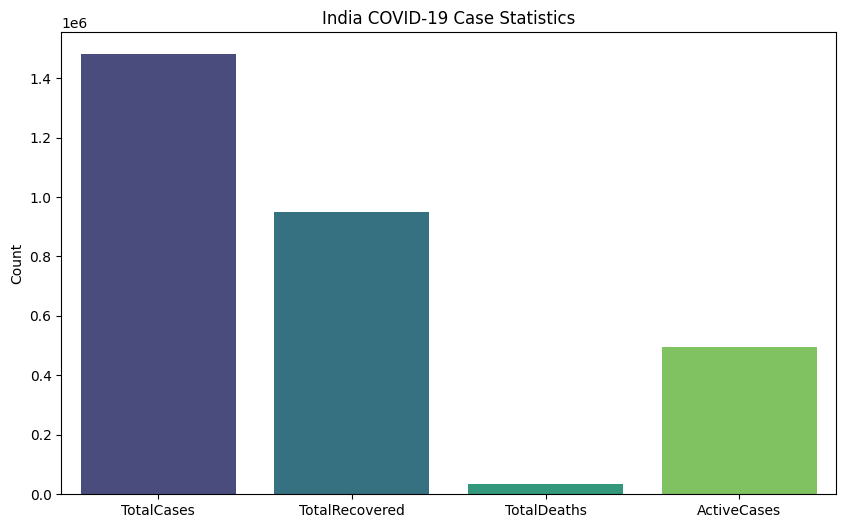

In [28]:
india = df[df['Country'] == 'India']

if not india.empty:
    labels = ['TotalCases', 'TotalRecovered', 'TotalDeaths', 'ActiveCases']
    values = india[labels].values.flatten()

    plt.figure(figsize=(10,6))
    sns.barplot(x=labels, y=values, palette='viridis')
    plt.title('India COVID-19 Case Statistics')
    plt.ylabel('Count')
    plt.show()
else:
    print("India not found in dataset.")


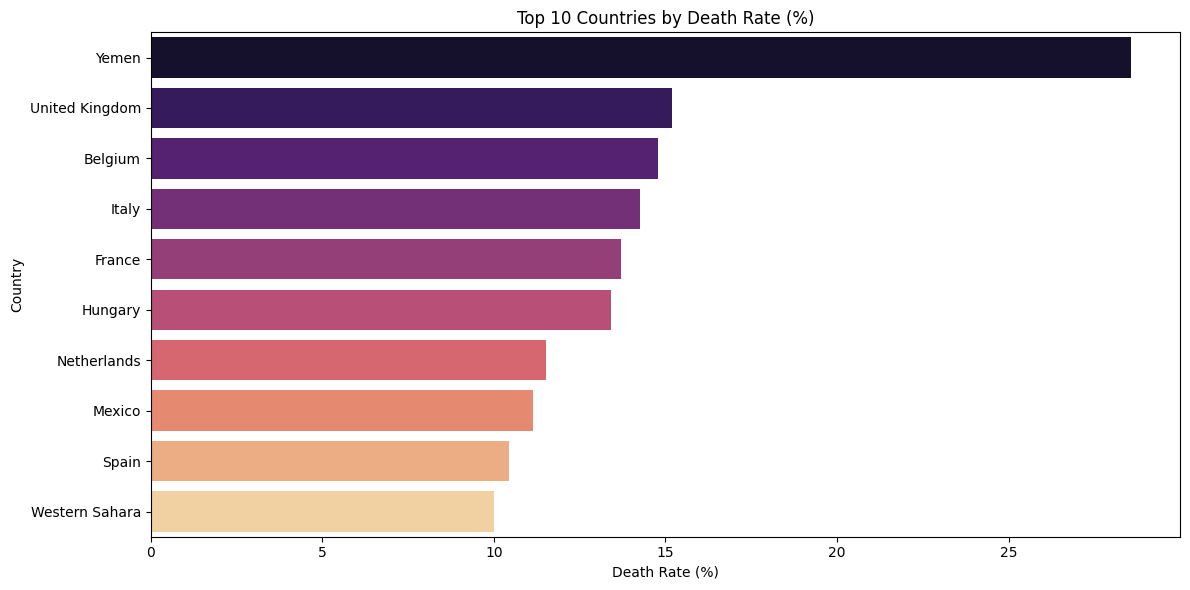

In [29]:
df['DeathRate (%)'] = (df['TotalDeaths'] / df['TotalCases']) * 100

df_death_rate = df.sort_values(by='DeathRate (%)', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='DeathRate (%)', y='Country', data=df_death_rate, palette='magma')
plt.title('Top 10 Countries by Death Rate (%)')
plt.xlabel('Death Rate (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


In [30]:
#Cleaned Dataset
df

,Country,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,DeathRate (%)
0,Afghanistan,36263,1269,25198,9796,3.499435
1,Albania,4880,144,2745,1991,2.950820
2,Algeria,27973,1163,18837,7973,4.157581
3,Andorra,907,52,803,52,5.733186
4,Angola,950,41,242,667,4.315789
...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,0.734394
183,Western Sahara,10,1,8,1,10.000000
184,Yemen,1691,483,833,375,28.562980
185,Zambia,4552,140,2815,1597,3.075571
